In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow INFO and WARNING messages
warnings.filterwarnings('ignore')    

In [3]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt 

E0000 00:00:1753268287.972100     106 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753268287.983829     106 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
mnist_train=pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")

In [5]:
mnist_train.shape

(60000, 785)

In [6]:
mnist1=mnist_train.iloc[:,1:]

In [7]:
mnist1.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


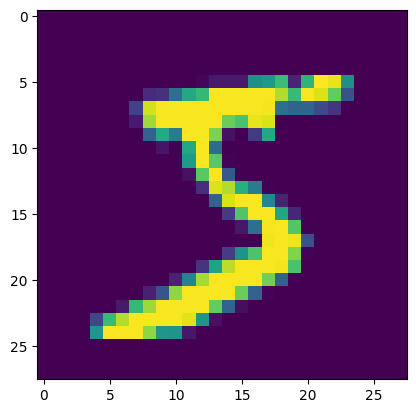

In [8]:
#lets consider one record first for understanding

abcd=mnist1.iloc[0]
abcd=np.array(abcd)
abcd=abcd.reshape(28,28)
plt.imshow(abcd)


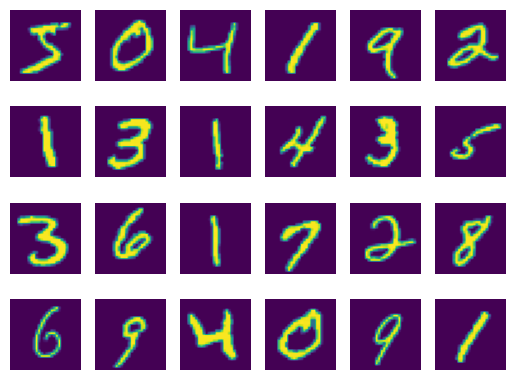

In [9]:
#now lets try to visualize first few records 
mnist1=np.array(mnist1)
for i in range (24):
    plt.subplot(4,6,i+1)
    plt.imshow(mnist1[i,:].reshape(28,28))
    plt.axis("off")

In [11]:
mnist_train_x=mnist_train.iloc[:,1::]

In [12]:
mnist_train_y=mnist_train.iloc[:,0]

In [13]:
mnist_test=pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")

In [37]:
mnist_test_x=mnist_test.iloc[:,1:]
mnist_test_y=mnist_test.iloc[:,0]

In [17]:
mnist_train_x = tf.keras.utils.normalize(mnist_train_x.astype('float32'))
mnist_test_x = tf.keras.utils.normalize(mnist_test_x.astype('float32'))

In [19]:
model=tf.keras.Sequential()


In [25]:
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #first hidden layer
model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu)) #second
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #third
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])




In [23]:
mnist_train.shape

(60000, 785)

In [22]:
mnist_train_x=np.array(mnist_train_x)
mnist_train_y=np.array(mnist_train_y)

In [26]:
model.fit(mnist_train_x,mnist_train_y,epochs=12,validation_split=0.2,batch_size=60)

Epoch 1/12
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9685 - loss: 0.3274 - val_accuracy: 0.9728 - val_loss: 0.1523
Epoch 2/12
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9909 - loss: 0.0444 - val_accuracy: 0.9717 - val_loss: 0.1451
Epoch 3/12
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9939 - loss: 0.0262 - val_accuracy: 0.9729 - val_loss: 0.1452
Epoch 4/12
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9927 - loss: 0.0292 - val_accuracy: 0.9645 - val_loss: 0.1757
Epoch 5/12
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9935 - loss: 0.0244 - val_accuracy: 0.9668 - val_loss: 0.1895
Epoch 6/12
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9933 - loss: 0.0293 - val_accuracy: 0.9715 - val_loss: 0.1471
Epoch 7/12
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9938 - loss: 0.0238 - val_accuracy: 0.9709 - val_loss: 0.1480
Epoch 8/12
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9940 - loss: 0.0218 - val_accuracy: 0.

In [27]:
mnist_test_x=np.array(mnist_test_x)

In [30]:
pred_values=model.predict(mnist_test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
#pred values will be in form of probability so we will use argmax() to get the predicted class
pred_class=np.argmax(pred_values,axis=1)


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(mnist_test_y,pred_class)

array([[ 971,    0,    3,    0,    0,    1,    4,    1,    0,    0],
       [   0, 1120,    7,    1,    0,    2,    1,    1,    3,    0],
       [   5,    0, 1020,    1,    1,    0,    1,    2,    2,    0],
       [   0,    0,   14,  977,    0,    9,    0,    5,    3,    2],
       [   1,    0,    6,    1,  945,    1,    7,    3,    1,   17],
       [   2,    0,    0,    7,    1,  871,    4,    0,    4,    3],
       [   4,    2,    2,    1,    2,    3,  944,    0,    0,    0],
       [   2,    4,   16,    3,    1,    0,    0,  991,    1,   10],
       [   6,    1,    8,    4,    1,    4,    9,    4,  931,    6],
       [   6,    2,    4,    3,    5,    5,    0,    2,    4,  978]])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(mnist_test_y,pred_class)

0.9748